# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [116]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [80]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
map_data = pd.read_csv(Path('./Data/neighborhoods_coordinates.csv')).dropna()

In [128]:
avg_df

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [131]:
avg_df = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby("year").mean()
line_chart2 = avg_df['gross_rent'].hvplot.line(title = 'Gross Rent', color='green', x='year', y='gross_rent')

In [132]:
line_chart2

:Curve   [year]   (gross_rent)

In [151]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_per_year_mean = sfo_data['housing_units'].groupby("year").mean()
    plt_housing_units = housing_per_year_mean.hvplot.bar(x='year', y='housing_units')
    plt_std = housing_per_year_mean.std()
    plt_min = housing_per_year_mean.min()
    plt_max = housing_per_year_mean.max()
    #I want to set the ylim to be the minimum minus the std and the max plus the std. But I don't know the syntax for hvplots.
    #plt_housing_units.set_ylim((plt_min - plt_std), (plt_max + plt_std))
    panel_object1  = pn.panel(plt_housing_units)
    return panel_object1

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_df = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby("year").mean()
#     fig = plt.figure()
#     line_chart = avg_df['sale_price_sqr_foot'].hvplot.line(title = 'Sale Price per Square Foot', color='red', y='sale_price_sqr_foot')
#     #line_chart.set_ylabel('Price per SqFt', fontsize=12)
#     fig = plt.figure()
    line_chart2 = avg_df['gross_rent'].hvplot.line(title = 'Gross Rent', color='green', x='year', y='gross_rent')
    #line_chart2.set_ylabel('Gross Rent Price', fontsize=12)
    #panel_object2  = pn.panel(line_chart)
    panel_object3  = pn.panel(line_chart2)
    return panel_object3


def average_sales_price():
    """Average Sales Price Per Year."""
    hv_df = sfo_data.groupby(["year","neighborhood"]).mean()
    hv_df.reset_index(inplace=True)
    hv_df.hvplot.line('year','sale_price_sqr_foot', groupby = 'neighborhood', ylabel = 'Average Price per SqFt')
    panel_object4  = pn.panel(hv_df.hvplot.line('year','sale_price_sqr_foot', groupby = 'neighborhood', ylabel = 'Average Price per SqFt'))
    return panel_object4

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    hv_df = sfo_data.groupby(["year","neighborhood"]).mean()
    hv_df.reset_index(inplace=True)
    hv_df.hvplot.line('year','gross_rent', groupby = 'neighborhood', ylabel = 'Average Monthly Rent')
    panel_object5  = pn.panel(hv_df.hvplot.line('year','gross_rent', groupby = 'neighborhood', ylabel = 'Average Monthly Rent'))
    return panel_object5


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top_10_df = sfo_data.groupby("neighborhood").mean()
    top_10_df_plot = top_10_df.sort_values('sale_price_sqr_foot', ascending = False).head(10)
    plt_top_10 = top_10_df_plot['sale_price_sqr_foot'].hvplot.bar(x='neighborhood', y='sale_price_sqr_foot')
#     plt_top_10.set_xlabel('Neighborhood')
#     plt_top_10.set_ylabel('Sale Price per SqFt')
    panel_object6  = pn.panel(plt_top_10)
    return panel_object6

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    top_10_expensive = hv_df.groupby(["year","neighborhood"]).mean()
    top_10_expensive_plot = top_10_expensive.sort_values('year')
    top_10_expensive_plot.hvplot.bar('year','gross_rent', groupby = 'neighborhood', ylabel = 'Average Monthly Rent') + top_10_expensive_plot.hvplot.bar('year','sale_price_sqr_foot', groupby = 'neighborhood', ylabel = 'Average Price per SqFt')
    panel_object7  = pn.panel(top_10_expensive_plot.hvplot.bar('year','gross_rent', groupby = 'neighborhood', ylabel = 'Average Monthly Rent') + top_10_expensive_plot.hvplot.bar('year','sale_price_sqr_foot', groupby = 'neighborhood', ylabel = 'Average Price per SqFt'))
    return panel_object7
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    df_expensive_neighborhoods = sfo_data.groupby(["year"]).max()
    df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
    df_expensive_neighborhoods_per_year = df_expensive_neighborhoods_per_year.reset_index()
    px.parallel_categories(
        df_expensive_neighborhoods_per_year,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sale Price per SqFt",
            "prophousing_units_size": "Property Size",
            "gross_rent": "Gross Rent"
        },
    )
    panel_object8  = pn.panel(px.parallel_categories(
        df_expensive_neighborhoods_per_year,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sale Price per SqFt",
            "prophousing_units_size": "Property Size",
            "gross_rent": "Gross Rent"
        },
    ))
    return panel_object8

def parallel_categories():
    """Parallel Categories Plot."""
    df_expensive_neighborhoods = sfo_data.groupby(["year"]).max()
    df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
    df_expensive_neighborhoods_per_year = df_expensive_neighborhoods_per_year.reset_index()
    px.parallel_coordinates(df_expensive_neighborhoods_per_year, color='gross_rent')
    panel_object9  = pn.panel(px.parallel_coordinates(df_expensive_neighborhoods_per_year, color='gross_rent'))
    return panel_object9

def neighborhood_map():
    """Neighborhood Map."""
    map_data = pd.read_csv(Path('./Data/neighborhoods_coordinates.csv')).dropna()
    map_data.rename(columns = {'Neighborhood': 'neighborhood'}, inplace = True)
    map_data.index = map_data['neighborhood']
    map_data = map_data.drop(map_data.columns[0], axis=1)
    new_sfo = sfo_data.reset_index()
    new_sfo = new_sfo.drop(new_sfo.columns[0], axis=1)
    new_sfo = new_sfo.groupby("neighborhood").mean()
    mapbox_data = pd.concat([map_data, new_sfo], axis=1, join='inner')
    mapbox_data = mapbox_data.reset_index()
    map_plot = px.scatter_mapbox(
       mapbox_data,
       lat="Lat",
       lon="Lon",
       size="sale_price_sqr_foot",
       color="neighborhood",
       zoom=10
    )
    panel_object10  = pn.pane.Plotly(map_plot)
    panel_object10._updates = True
    return panel_object10

def sunburst():
    """Sunburst Plot."""
    df_expensive_neighborhoods = sfo_data.groupby(["year"]).max()
    df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
    df_expensive_neighborhoods_per_year = df_expensive_neighborhoods_per_year.reset_index()    
    fig = px.sunburst(df_expensive_neighborhoods_per_year,
                      path=["year", "neighborhood", "gross_rent", "sale_price_sqr_foot"],
                      values='housing_units',
                      title="Most expensive neighborhoods in San Francisco per year",
                      width=750, height=750)
    panel_object11  = pn.panel(fig)
    return panel_object11

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [152]:
# Create a Title for the Dashboard



# Create a tab layout for the dashboard
rental_dashboard = pn.Tabs(
    ("Housing per Year", housing_units_per_year), ("Average Gross Rent", average_gross_rent), ("Average Sale Price", average_sales_price)
    , ("Average Price by Neighborhood", average_price_by_neighborhood), ("Most Expensive Neighborhoods", top_most_expensive_neighborhoods), ("Most Expensive Rental Neighborhoods", most_expensive_neighborhoods_rent_sales)
    , ("Parallel Categories", parallel_categories), ("Parallel Coordinanates", parallel_coordinates)
    , ("Sunburst", sunburst), ("Map", neighborhood_map)
    
)


# Create the dashboard


## Serve the Panel Dashboard

In [153]:
# Serve the# dashboard
rental_dashboard.servable()

Tabs
    [0] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars)
    [1] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Curve)
    [2] Column
        [0] Column()
        [1] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
    [3] Column
        [0] Column()
        [1] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
    [4] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars)
    [5] Column
        [0] Column()
        [1] Row
            [0] Row
                [0] HoloViews(Layout)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
    [6] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure)
    [7] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure)
    [8] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure)
    [9] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [110]:
housing_units_per_year()

HoloViews(Bars)

In [130]:
average_gross_rent()

(Str(Text), HoloViews(Curve))

In [68]:
average_sales_price()

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

In [69]:
average_price_by_neighborhood()

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

Str(AxesSubplot)

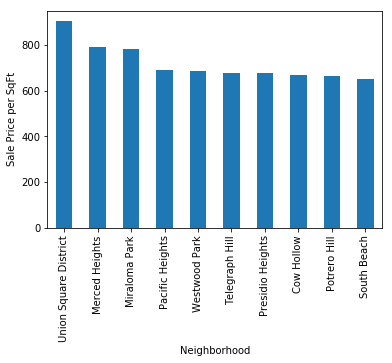

In [70]:
top_most_expensive_neighborhoods()

In [71]:
most_expensive_neighborhoods_rent_sales()

Row
    [0] HoloViews(Layout)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

In [87]:
neighborhood_map()

Launching server at http://localhost:59521


In [88]:
type(map_data)

pandas.core.frame.DataFrame

In [73]:
parallel_categories()

Plotly(Figure)

In [74]:
parallel_coordinates()

Plotly(Figure)

In [75]:
sunburst()

Plotly(Figure)